In [1]:
from sdeint import SdeInt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

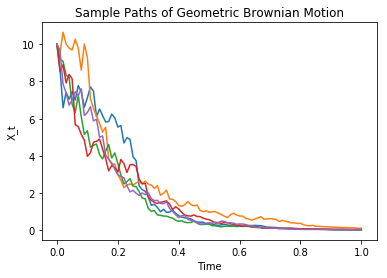

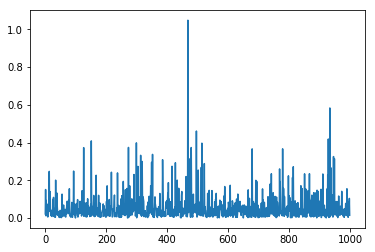

In [2]:
# Geometric Brownian Motion
# S_0 = 1
# dS_t = \mu * S_t dt + \sigma * S_t dW_t
# Solution: S_0 * e^((\mu - \sigma^2/2)*t + \sigma*W_t)
# where W_t ~ N(0,t)

mu = -5
sigma = 1
x_0 = 10
T = 1
n = 1000

def A(x, t):
    return mu*x

def B(x, t):
    return sigma*x

def C(x, t):
    return sigma**2 * x/2

tspan = np.linspace(0, T, 101)
x_t = np.zeros((len(tspan), n))

for i in range(n):
    x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
    
# plot of sample path
plt.figure()
plt.title("Sample Paths of Geometric Brownian Motion")
plt.ylabel("X_t")
plt.xlabel("Time")
plt.plot(tspan, x_t[:,-1])
plt.plot(tspan, x_t[:,-2])
plt.plot(tspan, x_t[:,-3])
plt.plot(tspan, x_t[:,-4])
plt.plot(tspan, x_t[:,-5])

# plot of final distribution
plt.figure()
plt.plot(x_t[-1,:])

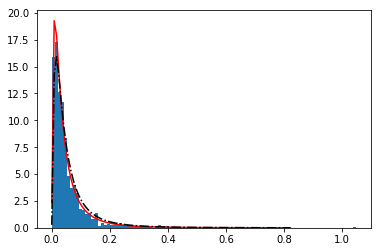

In [3]:
# Need to fit a log-normal of the form above
from scipy.stats import lognorm
x_T = x_t[-1,:]
plt.hist(x_T, density=True, bins=100)
params = lognorm.fit(x_T)
theoretical_params = (sigma*np.sqrt(T), 0, x_0*np.exp((mu-sigma**2/2)*T))

x = np.linspace(lognorm.ppf(0.001, *params), lognorm.ppf(0.999, *params), 100)
plt.plot(x, lognorm.pdf(x, *params), 'r-', label='approx lognorm pdf')
plt.plot(x, lognorm.pdf(x, *theoretical_params), 'k-.', label='true lognorm pdf')

In [4]:
# Calcualte errors for Geometric Brownian Motion
print("Weak error: {}".format(abs(lognorm.mean(*theoretical_params)-lognorm.mean(*params))))

Weak error: 0.010416242950111336


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


0.0032099639052188076
0.003580067038050343
0.0012641942056382943
0.0019278094178757684
0.0005137741536508509
0.00032887525157342335
5.8375124527855004e-05
1.0852534301839328e-05
-4.596719469025963e-06
0.00022086529789797082


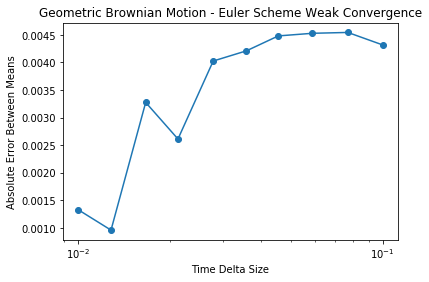

In [15]:
# get plot of errors - GBM Euler Scheme

mu = -10
sigma = 1
x_0 = 100
T = 1 # final time point
n = 100 # number of sample path
theoretical_params = (sigma*np.sqrt(T), 0, x_0*np.exp((mu-sigma**2/2)*T))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return mu*x

def B(x, t):
    return sigma*x

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
        
    x_T = x_t[-1,:]
    params = lognorm.fit(x_T)
    print(lognorm.mean(*params))

    weak_errors.append(abs(lognorm.mean(*theoretical_params)-lognorm.mean(*params)))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Geometric Brownian Motion - Euler Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
plt.plot(delta_t, weak_errors, "-o")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


0.0040107546972914
0.004379122434834875
0.004220114308273945
0.0037179021858118836
0.003522671134528286
0.0028824441780389604
0.0021865546015466444
0.0011743560084795223
0.00011127584004456091
-9.641918976591168e-05


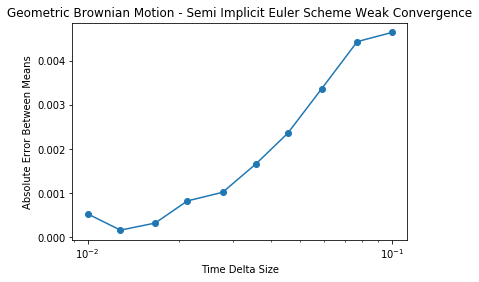

In [16]:
# get plot of errors - GBM Semi Implicit Euler Scheme

mu = -10
sigma = 1
x_0 = 100
T = 1 # final time point
n = 100 # number of sample path
theoretical_params = (sigma*np.sqrt(T), 0, x_0*np.exp((mu-sigma**2/2)*T))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return mu*x

def B(x, t):
    return sigma*x

def Acorr(x, t):
    return -sigma**2 * x/2

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().SemiEuler(A, B, x_0, tspan, Acorr=Acorr, Ito=True)
        
    x_T = x_t[-1,:]
    params = lognorm.fit(x_T)
    print(lognorm.mean(*params))

    weak_errors.append(abs(lognorm.mean(*theoretical_params)-lognorm.mean(*params)))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Geometric Brownian Motion - Semi Implicit Euler Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
plt.plot(delta_t, weak_errors, "-o")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


0.002483690036873396
0.0018601597807233233
0.00181065342306715
0.0012287144392035458
0.000820820255731315
0.000455779852508665
0.00015873584008668575
5.6465689613919635e-06
-2.427148997052376e-06
2.1785159865783665e-05


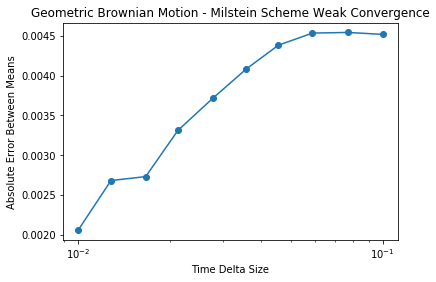

In [17]:
# get plot of errors - GBM Milstein Scheme

mu = -10
sigma = 1
x_0 = 100
T = 1 # final time point
n = 100 # number of sample path
theoretical_params = (sigma*np.sqrt(T), 0, x_0*np.exp((mu-sigma**2/2)*T))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return mu*x

def B(x, t):
    return sigma*x

def C(x, t):
    return sigma**2 * x/2

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().Milstein(A, B, x_0, tspan, C=C)
        
    x_T = x_t[-1,:]
    params = lognorm.fit(x_T)
    print(lognorm.mean(*params))

    weak_errors.append(abs(lognorm.mean(*theoretical_params)-lognorm.mean(*params)))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Geometric Brownian Motion - Milstein Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
plt.plot(delta_t, weak_errors, "-o")

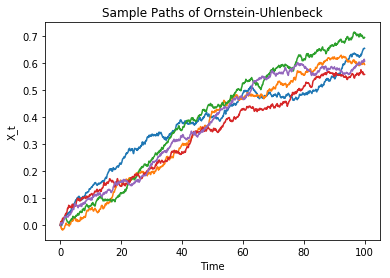

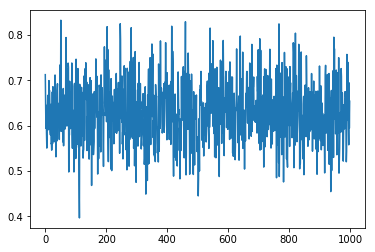

In [18]:
# Ornstein-Uhlenbeck Example
# X_0 = 0
# X_t = \mu*(\theta-X_t) dt + \sigma dW_t
# Solution: X_t = X_0 e^(-\mu t)+ \theta*(1-e^(-mu*T)) + sqrt(\sigma/\mu (1-e^(-2 \mu t))) W_t
# where X_t ~ N(X_0 e^(-\mu t)+ \theta*(1-e^(-mu*T)), \sigma/\mu (1-e^(-2 \mu t))

mu = 0.01
theta = 1
sigma = 0.01
x_0 = 0
T = 100 # final time point
n = 1000 # number of sample path

def A(x, t):
    return mu*(theta-x)

def B(x, t):
    return sigma

def C(x, t):
    return 0

tspan = np.linspace(0, T, 1001)
x_t = np.zeros((len(tspan), n))

for i in range(n):
    x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
    
# plot of sample path
plt.figure()
plt.title("Sample Paths of Ornstein-Uhlenbeck")
plt.ylabel("X_t")
plt.xlabel("Time")
plt.plot(tspan, x_t[:,-1])
plt.plot(tspan, x_t[:,-2])
plt.plot(tspan, x_t[:,-3])
plt.plot(tspan, x_t[:,-4])
plt.plot(tspan, x_t[:,-5])


# plot of final distribution
plt.figure()
plt.plot(x_t[-1,:])

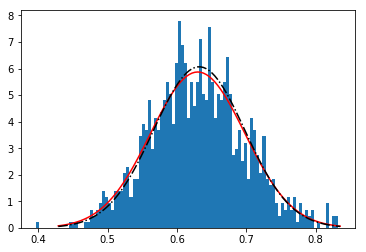

In [19]:
# Need to fit a Normal

from scipy.stats import norm
x_T = x_t[-1,:]
plt.hist(x_T, density=True, bins=100)
params = norm.fit(x_T)
theoretical_params = (x_0*np.exp(-mu*T)+theta*(1-np.exp(-mu*T)), (sigma**2/(2*mu) *(1-np.exp(-2*mu*T)))**(1/2))

x = np.linspace(norm.ppf(0.001 , *theoretical_params), norm.ppf(0.999, *theoretical_params), 100)
plt.plot(x, norm.pdf(x, *params), 'r-', label='approx norm pdf')
plt.plot(x, norm.pdf(x, *theoretical_params), 'k-.', label='true norm pdf')

In [20]:
def calc_error(true_params, approx_params):
    """
    Calculate E[|X-X_hat|] which is a folded normal for OU
    """
    from scipy.stats import norm
    mu_diff = true_params[0]-approx_params[0]
    sigma_diff = np.sqrt(true_params[1]**2 + approx_params[1]**2)
    first_term = np.sqrt(2/np.pi)*sigma_diff*np.exp(-mu_diff**2/(2*sigma_diff**2)) if abs(np.sqrt(2/np.pi)*sigma_diff*np.exp(-mu_diff**2/(2*sigma_diff**2))) > 10e-6 else 0
    second_term = mu_diff*(1-2*norm.cdf(-mu_diff/sigma_diff, 0, 1)) if abs(mu_diff*(1-2*norm.cdf(-mu_diff/sigma_diff, 0, 1))) > 10e-6 else 0
    return first_term+second_term
    

In [21]:
# Calcualte errors for other equation
print("Weak error: {}".format(abs(norm.mean(*theoretical_params)-norm.mean(*params))))
print("Strong error: {}".format(calc_error(theoretical_params, params)))

Weak error: 0.0021346261152670465
Strong error: 0.07546062167279279


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


633.9952463799547
634.5077757342918
635.2672034829698
636.1554781907965
637.4430827161209
639.0421833187371
641.0473697700542
643.9248048676285
647.993405117536
653.556378938114


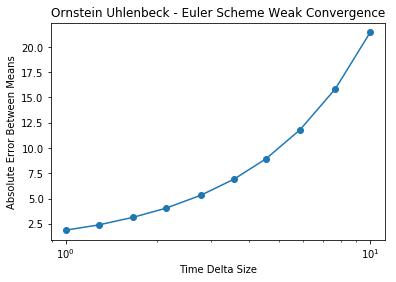

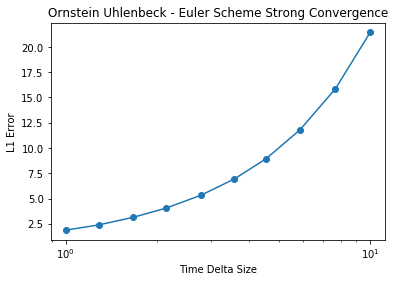

In [12]:
# get plot of errors - OU Euler Scheme

mu = 0.01
theta = 1000
sigma = 0.01
x_0 = 0
T = 100 # final time point
n = 100 # number of sample path
theoretical_params = (x_0*np.exp(-mu*T)+theta*(1-np.exp(-mu*T)), (sigma**2/(2*mu) *(1-np.exp(-2*mu*T)))**(1/2))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return mu*(theta-x)

def B(x, t):
    return sigma

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
        
    x_T = x_t[-1,:]
    params = norm.fit(x_T)
    print(norm.mean(*params))

    weak_errors.append(abs(norm.mean(*theoretical_params)-norm.mean(*params)))
    strong_errors.append(calc_error(theoretical_params, params))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Ornstein Uhlenbeck - Euler Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
plt.plot(delta_t, weak_errors, "-o")

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Ornstein Uhlenbeck - Euler Scheme Strong Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("L1 Error")
plt.xscale("log")
plt.plot(delta_t, strong_errors, "-o")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


632.1263198131232
632.12699004621
632.1260486369896
632.1525539713598
632.1570278103239
632.1497039647585
632.2000252421237
632.2450753708515
632.3757753180153
632.5663823619568


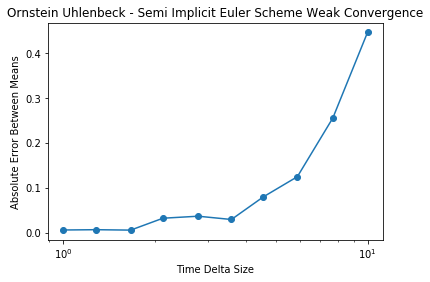

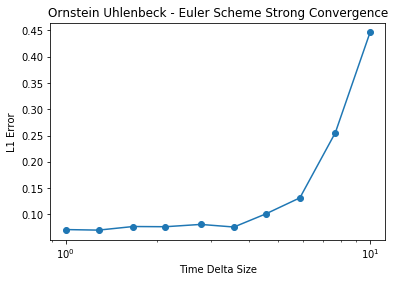

In [13]:
# get plot of errors - OU Semi Implicit Euler Scheme

mu = 0.01
theta = 1000
sigma = 0.01
x_0 = 0
T = 100 # final time point
n = 100 # number of sample path
theoretical_params = (x_0*np.exp(-mu*T)+theta*(1-np.exp(-mu*T)), (sigma**2/(2*mu) *(1-np.exp(-2*mu*T)))**(1/2))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return mu*(theta-x)

def B(x, t):
    return sigma

def Acorr(x, t):
    return 0

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().SemiEuler(A, B, x_0, tspan, Acorr=Acorr, Ito=True)
        
    x_T = x_t[-1,:]
    params = norm.fit(x_T)
    print(norm.mean(*params))

    weak_errors.append(abs(norm.mean(*theoretical_params)-norm.mean(*params)))
    strong_errors.append(calc_error(theoretical_params, params))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Ornstein Uhlenbeck - Semi Implicit Euler Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
plt.plot(delta_t, weak_errors, "-o")

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Ornstein Uhlenbeck - Euler Scheme Strong Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("L1 Error")
plt.xscale("log")
plt.plot(delta_t, strong_errors, "-o")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


633.9889163194499
634.5308907655606
635.2635636133277
636.1495766277753
637.4475939549866
639.0377780394206
641.0588217574108
643.9257172237177
648.0016730834137
653.5686319770617


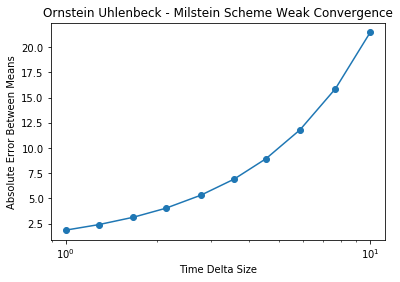

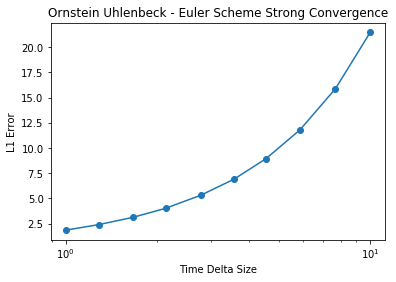

In [14]:
# get plot of errors - OU Milstein Scheme

mu = 0.01
theta = 1000
sigma = 0.01
x_0 = 0
T = 100 # final time point
n = 100 # number of sample path
theoretical_params = (x_0*np.exp(-mu*T)+theta*(1-np.exp(-mu*T)), (sigma**2/(2*mu) *(1-np.exp(-2*mu*T)))**(1/2))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return mu*(theta-x)

def B(x, t):
    return sigma

def C(x, t):
    return 0

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().Milstein(A, B, x_0, tspan, C=C)
        
    x_T = x_t[-1,:]
    params = norm.fit(x_T)
    print(norm.mean(*params))

    weak_errors.append(abs(norm.mean(*theoretical_params)-norm.mean(*params)))
    strong_errors.append(calc_error(theoretical_params, params))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Ornstein Uhlenbeck - Milstein Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
plt.plot(delta_t, weak_errors, "-o")

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Ornstein Uhlenbeck - Euler Scheme Strong Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("L1 Error")
plt.xscale("log")
plt.plot(delta_t, strong_errors, "-o")